<a href="https://colab.research.google.com/github/Himangi-77/Sparks-Foundation-Internship/blob/main/Task_1_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score

In [177]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Statistical Analysis

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [179]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

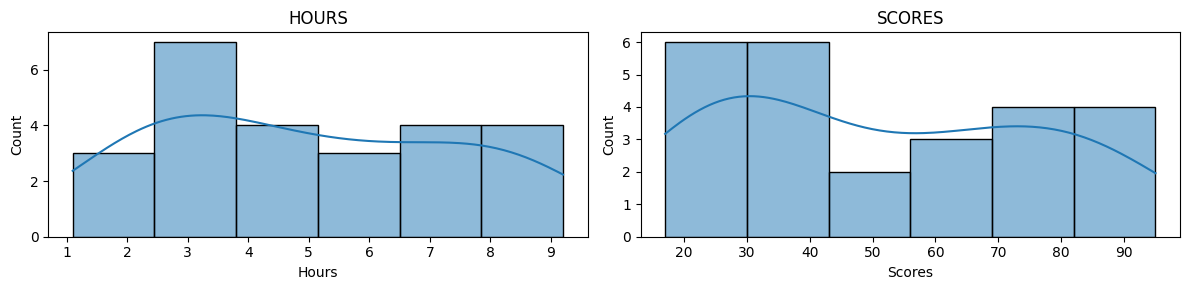

In [180]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))

sns.histplot(data=data['Hours'], ax=ax[0], kde=True)
ax[0].set_title('HOURS')

sns.histplot(data=data['Scores'], ax=ax[1], kde=True)
ax[1].set_title('SCORES')

plt.tight_layout()
plt.show()

1. Maximum people have studied between 2.5 and 3.5 hours
2. Maximum people have scored between 20 to 40




[]

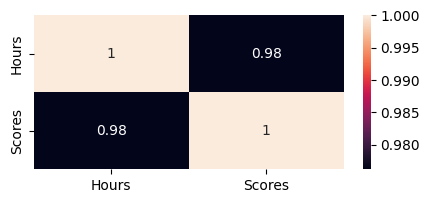

In [181]:
plt.figure(figsize=(5,2))
sns.heatmap(data.corr(),annot=True)
plt.plot()

As we can see there is strong correlation between the two variables

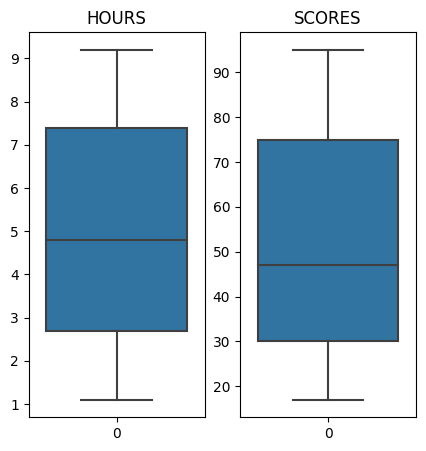

In [182]:
fig, ax = plt.subplots(1, 2, figsize=(5, 5))

sns.boxplot(data=data['Hours'], ax=ax[0], showfliers=True)
ax[0].set_title('HOURS')

sns.boxplot(data=data['Scores'], ax=ax[1], showfliers=True)
ax[1].set_title('SCORES')

plt.show()


There are no outliers.

# Data Preprocessing

In [183]:
x = np.array(data['Hours']).reshape(-1,1)
y = np.array(data['Scores']).reshape(-1,1)

In [184]:
X_train, x_test, Y_train, y_test = train_test_split(x,y,test_size=0.4)

In [185]:
len(Y_train)

15

# Model Training and Prediction

In [159]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [192]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
lasso.fit(X_train,Y_train)
ridge.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [193]:
y_pred_lr = lr.predict(x_test)
y_pred_lasso = lasso.predict(x_test)
y_pred_ridge = ridge.predict(x_test)

In [200]:
r_score_lr = r2_score(y_test,y_pred_lr)
r_score_lasso = r2_score(y_test,y_pred_lasso)
r_score_ridge = r2_score(y_test,y_pred_ridge)

print(f"R-Squared Linear Regression: {r_score_lr}")
print(f"R-Squared Lasso Regression: {r_score_lasso}")
print(f"R-Squared Ridge Regression: {r_score_ridge}")

mse_lr = mean_squared_error(y_test,y_pred_lr)
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)

print(f"Mean Squared Error Linear Regression: {mse_lr}")
print(f"Mean Squared Error Lasso Regression: {mse_lasso}")
print(f"Mean Squared Error Ridge Regression: {mse_ridge}")

R-Squared Linear Regression: 0.9538947927307482
R-Squared Lasso Regression: 0.9539171657812721
R-Squared Ridge Regression: 0.9539916582865391
Mean Squared Error Linear Regression: 26.60685406301254
Mean Squared Error Lasso Regression: 26.593942799285696
Mean Squared Error Ridge Regression: 26.550953919421154
Root Mean Squared Error: 5.152761775923777
Mean Percentage Error: -4.619705176755557


In [201]:
rmse = np.sqrt(mse_ridge)
mpe = np.mean(((y_test - y_pred_ridge)/y_test)*100)

print(f'Root Mean Squared Error: {rmse}')
print(f"Mean Percentage Error: {mpe}")

Root Mean Squared Error: 5.152761775923777
Mean Percentage Error: -4.619705176755557


In [202]:
pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred_ridge.flatten()})

,Actual,Predicted
0,21,27.671805
1,54,49.629429
2,60,56.312184
3,30,27.671805
4,88,91.635317
5,30,37.218598
6,85,77.315128
7,27,34.354560
8,24,21.943730
9,30,29.581164


# Model Evaluation

In [203]:
data['Predicted Scores'] = ridge.predict(x)
data

,Hours,Scores,Predicted Scores
0,2.5,21,27.671805
1,5.1,47,52.493467
2,3.2,27,34.354560
3,8.5,75,84.952562
4,3.5,30,37.218598
5,1.5,20,18.125013
6,9.2,88,91.635317
7,5.5,60,56.312184
8,8.3,81,83.043203
9,2.7,25,29.581164


<ipython-input-204-3fdbe0a5b6d2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Predicted Scores'], color='blue', label='Predicted Scores')
<ipython-input-204-3fdbe0a5b6d2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Scores'], color='orange', label='Actual Scores')


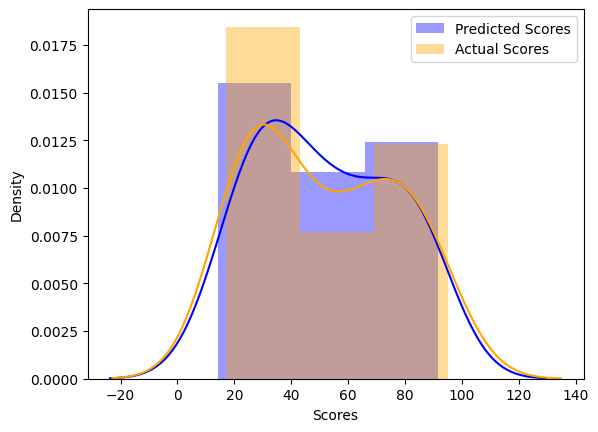

In [204]:
sns.distplot(data['Predicted Scores'], color='blue', label='Predicted Scores')

sns.distplot(data['Scores'], color='orange', label='Actual Scores')

plt.xlabel('Scores')
plt.ylabel('Density')
plt.legend()

plt.show()

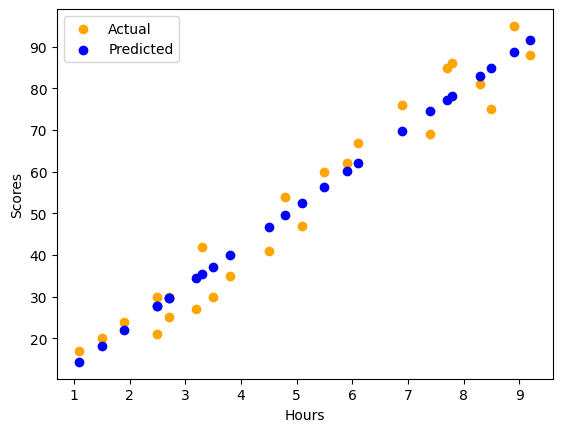

In [205]:
plt.scatter(data['Hours'],data['Scores'],color='orange',label='Actual')
plt.scatter(data['Hours'],data['Predicted Scores'],color='blue',label='Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()

<Axes: xlabel='Hours', ylabel='Scores'>

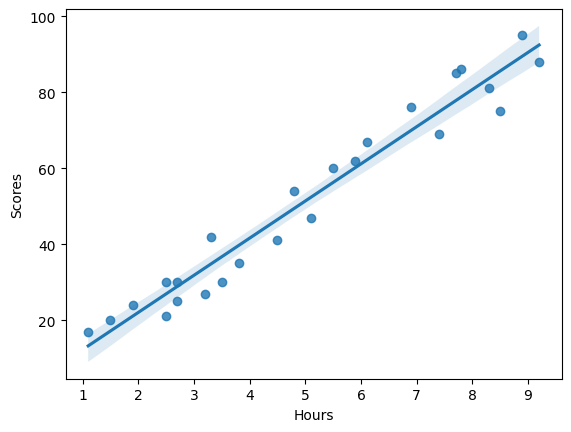

In [206]:
sns.regplot(data=data,x='Hours',y='Scores')

#### Let's see how much you would score if you studied 8 hours total

In [210]:
ridge.predict([[8]])

array([[80.17916552]])